In [1]:
# get the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(iris.data, iris.target)

DecisionTreeClassifier(random_state=0)

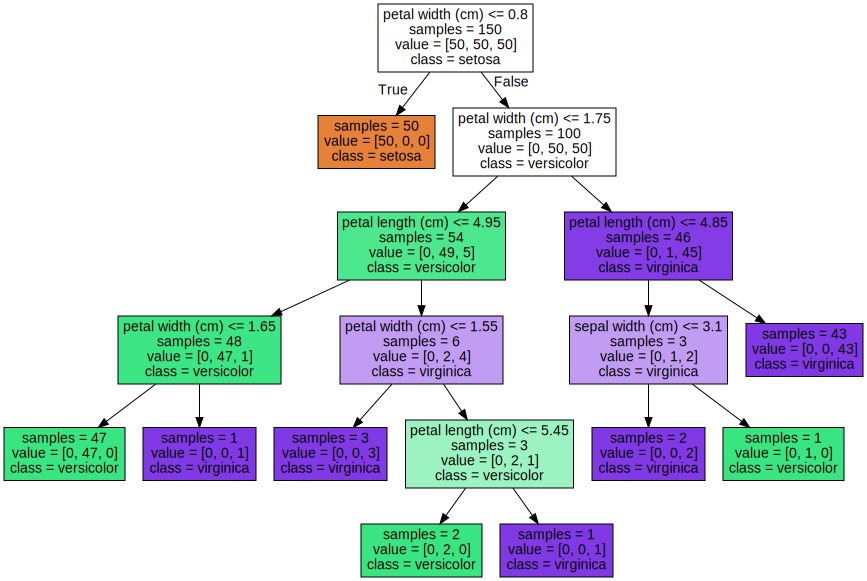

In [4]:
# visualize the tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

# print the tree
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


Explain tree

In [5]:

def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        # This is a leaf node, get the predicted class
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        # Construct the explanation for the leaf node
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return '\n'.join(explanation)
    else:
        # This is an internal node, get the feature and threshold for the decision rule
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        # Construct the explanation for the decision rule
        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')
        # Recur on the left subtree (True branch)
        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
        # Update the explanation for the right branch
        explanation[-1] = explanation[-1].replace('<=', '>')
        # Recur on the right subtree (False branch)
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
        return f'{left_explanation}\n\nOtherwise, {right_explanation}'

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree

In [8]:
# explain the tree
print(explain_tree(tree, iris.feature_names, iris.target_names))

If the petal width (cm) <= 0.80,
Then this observation is classified as "setosa".

Otherwise, If the petal width (cm) > 0.80,
and if the petal width (cm) <= 1.75,
and if the petal length (cm) <= 4.95,
and if the petal width (cm) <= 1.65,
Then this observation is classified as "versicolor".

Otherwise, If the petal width (cm) > 0.80,
and if the petal width (cm) <= 1.75,
and if the petal length (cm) <= 4.95,
and if the petal width (cm) > 1.65,
Then this observation is classified as "virginica".

Otherwise, If the petal width (cm) > 0.80,
and if the petal width (cm) <= 1.75,
and if the petal length (cm) > 4.95,
and if the petal width (cm) <= 1.55,
Then this observation is classified as "virginica".

Otherwise, If the petal width (cm) > 0.80,
and if the petal width (cm) <= 1.75,
and if the petal length (cm) > 4.95,
and if the petal width (cm) > 1.55,
and if the petal length (cm) <= 5.45,
Then this observation is classified as "versicolor".

Otherwise, If the petal width (cm) > 0.80,
and if

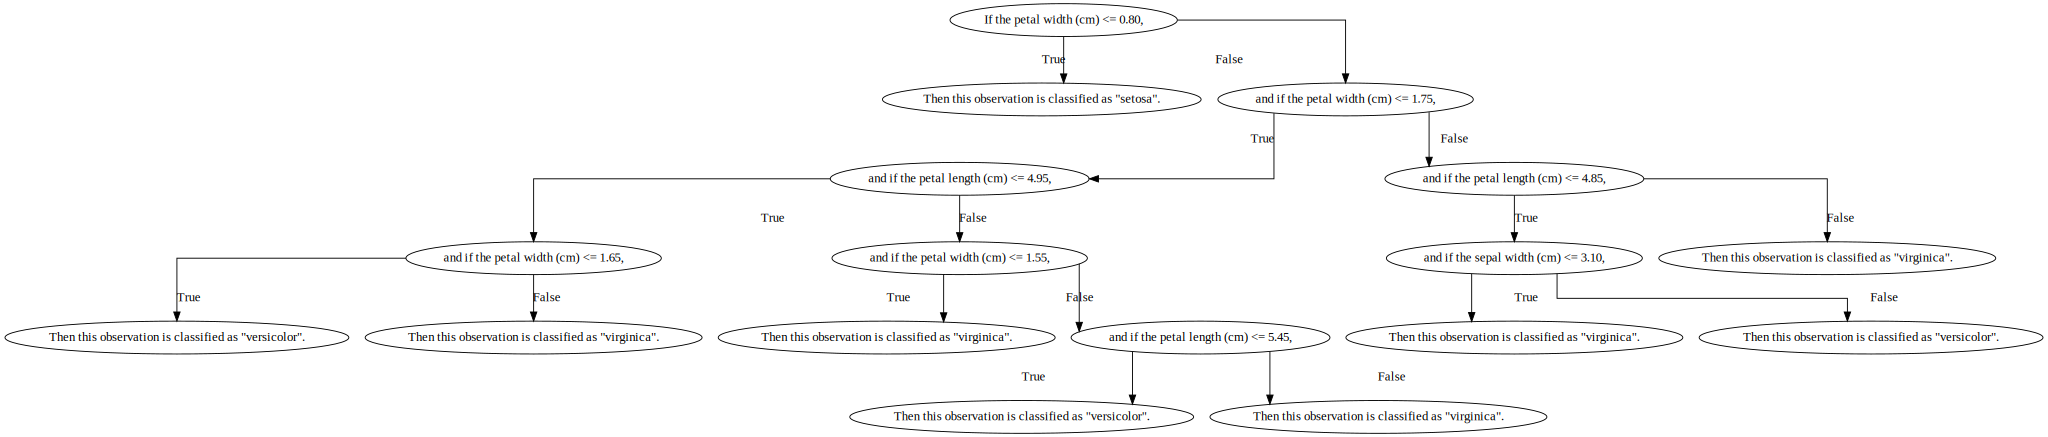

In [9]:
# Graph explanation

def build_graph(decision_tree, feature_names, class_names, node=0, depth=0, parent=None, branch=None):
    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation = f'Then this observation is classified as "{class_name}".'
        graph.node(str(node), label=explanation)
        if parent is not None:
            graph.edge(str(parent), str(node), label=branch)
        return

    feature = feature_names[decision_tree.tree_.feature[node]]
    threshold = decision_tree.tree_.threshold[node]
    explanation = f'If the {feature} <= {threshold:.2f},' if depth == 0 else f'and if the {feature} <= {threshold:.2f},'
    graph.node(str(node), label=explanation)
    if parent is not None:
        graph.edge(str(parent), str(node), label=branch)

    build_graph(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, node, "True")
    build_graph(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, node, "False")

graph = graphviz.Digraph(format='png', graph_attr={'splines': 'ortho'})
build_graph(tree, iris.feature_names, iris.target_names)
display(graph)